In [2]:
!pip install psycopg2-binary

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import psycopg2 as psycop

## Importing the data

In [8]:
 connection = psycop.connect(
        host="host.docker.internal",
        dbname="airflow",
        port=5532,
        user="postgres",
        password="postgres",
    )
connection.autocommit = True
cur = connection.cursor()


## Import historical data

sql_query = "SELECT * FROM uniswap_table_historic"
df_hist = pd.read_sql(sql_query, connection)

## Import realtime data

sql_query = "SELECT * FROM uniswap_table"
df = pd.read_sql(sql_query, connection)

/tmp/ipykernel_65/3328249937.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_hist = pd.read_sql(sql_query, connection)
/tmp/ipykernel_65/3328249937.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, connection)


In [6]:
df_hist.head()

,tradeindex,block_timestamp_time,block_height,exchange_fullname,timeinterval_minute,trades,buyamount,sellamount,tradeamount,basecurrency_symbol,quotecurrency_symbol,transaction_hash,transaction_gas,transaction_to_address,transaction_txfrom_address
0,3,2023-05-11 19:06:11,17239059,Uniswap,2023-05-11 19:06:00,1,783.063028,776.980470,776.980470,DAI,ETH,0x8aa52fbf80fd05c22bd59844e2b7b8d8ee84195c8571...,221977,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0x993d8b9168be7091f26b39e7c2aa3af0ecb589e1
1,3,2023-05-11 19:06:11,17239059,Uniswap,2023-05-11 19:06:00,1,783.063028,776.980470,776.980470,ETH,DAI,0x8aa52fbf80fd05c22bd59844e2b7b8d8ee84195c8571...,221977,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0x993d8b9168be7091f26b39e7c2aa3af0ecb589e1
2,4,2023-05-11 18:42:35,17238943,Uniswap,2023-05-11 18:42:00,1,3.563830,3.581855,3.563830,USDC,ETH,0x21fa16feeb6b44982e5b985c442bff8742b636a9ef92...,259570,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0xc294456c73ac9ba72406a52bffc7899688099b90
3,4,2023-05-11 18:42:35,17238943,Uniswap,2023-05-11 18:42:00,1,3.563830,3.581855,3.563830,ETH,USDC,0x21fa16feeb6b44982e5b985c442bff8742b636a9ef92...,259570,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0xc294456c73ac9ba72406a52bffc7899688099b90
4,6,2023-05-11 18:28:59,17238876,Uniswap,2023-05-11 18:28:00,1,1298.669856,1328.393582,1298.669856,MKR,ETH,0x92d56f05302beae3b45994f58355be1fd7541030fddf...,127846,0x24902aa0cf0000a08c0ea0b003b0c0bf600000e0,0xd7e1236c08731c3632519dcd1a581bfe6876a3b2


In [9]:
df.head()

,tradeindex,block_timestamp_time,block_height,exchange_fullname,timeinterval_minute,trades,buyamount,sellamount,tradeamount,basecurrency_symbol,quotecurrency_symbol,transaction_hash,transaction_gas,transaction_to_address,transaction_txfrom_address
0,3,2023-05-11 19:06:11,17239059,Uniswap,2023-05-11 19:06:00,1,783.063028,776.980470,776.980470,DAI,ETH,0x8aa52fbf80fd05c22bd59844e2b7b8d8ee84195c8571...,221977,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0x993d8b9168be7091f26b39e7c2aa3af0ecb589e1
1,3,2023-05-11 19:06:11,17239059,Uniswap,2023-05-11 19:06:00,1,783.063028,776.980470,776.980470,ETH,DAI,0x8aa52fbf80fd05c22bd59844e2b7b8d8ee84195c8571...,221977,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0x993d8b9168be7091f26b39e7c2aa3af0ecb589e1
2,4,2023-05-11 18:42:35,17238943,Uniswap,2023-05-11 18:42:00,1,3.563830,3.581855,3.563830,USDC,ETH,0x21fa16feeb6b44982e5b985c442bff8742b636a9ef92...,259570,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0xc294456c73ac9ba72406a52bffc7899688099b90
3,4,2023-05-11 18:42:35,17238943,Uniswap,2023-05-11 18:42:00,1,3.563830,3.581855,3.563830,ETH,USDC,0x21fa16feeb6b44982e5b985c442bff8742b636a9ef92...,259570,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0xc294456c73ac9ba72406a52bffc7899688099b90
4,6,2023-05-11 18:28:59,17238876,Uniswap,2023-05-11 18:28:00,1,1298.669856,1328.393582,1298.669856,MKR,ETH,0x92d56f05302beae3b45994f58355be1fd7541030fddf...,127846,0x24902aa0cf0000a08c0ea0b003b0c0bf600000e0,0xd7e1236c08731c3632519dcd1a581bfe6876a3b2


## Check: is there missing data?

In [76]:
print("There is missing data in the df:")
df.isnull().values.any()

There is missing data in the df:


True

In [77]:
print("How many missing values are there per column?")
df.isnull().sum()

How many missing values are there per column?


timeInterval_minute             0
baseAmount                      0
quoteAmount                     0
trades                          0
quotePrice                      0
maximum_price                   0
minimum_price                   0
open_price                      0
close_price                     0
baseCurrency_symbol           706
baseCurrency_address            0
quoteCurrency_symbol          706
quoteCurrency_address           0
transaction_hash                0
transaction_gas                 0
transaction_to_address          0
transaction_txFrom_address      0
dtype: int64

Is there anything in common with the missing currency symbol data?  It appears to not have a particular pattern:

In [80]:
df.loc[df['baseCurrency_symbol'].isnull()].head(10)

,timeInterval_minute,baseAmount,quoteAmount,trades,quotePrice,maximum_price,minimum_price,open_price,close_price,baseCurrency_symbol,baseCurrency_address,quoteCurrency_symbol,quoteCurrency_address,transaction_hash,transaction_gas,transaction_to_address,transaction_txFrom_address
13721,2023-04-13 01:47:00,340.015702,315.525693,1,0.000007,0.000007,0.000007,0.000007,0.000007,NaN,0x5b8650cd999b23cf39ab12e3213fbc8709c7f5cb,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xb56c122ead5a8c0e83439a78ece937c2f7751d005928...,149775,0xef1c6e67703c7bd7107eed8303fbe6ec2554bf6b,0x54af893dc51592f585b69ab07758a2407bbebef5
13886,2023-04-13 01:49:00,560.498152,525.371562,1,0.000007,0.000007,0.000007,0.000007,0.000007,NaN,0x5b8650cd999b23cf39ab12e3213fbc8709c7f5cb,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x871288bf9ecc6f4b58238c1483fdc9e5cdf615b4f3e7...,156010,0x4870525eae23fceb31df613d179ef6275e1b93a9,0x76f36d497b51e48a288f03b4c1d7461e92247d5e
42885,2023-04-13 06:25:00,115.516013,116.537463,1,0.000035,0.000035,0.000035,0.000035,0.000035,NaN,0x431ad2ff6a9c365805ebad47ee021148d6f7dbe0,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x1f6521313ad73c2b8928f5ff265470d143d44a62b186...,278716,0xbd4dbe0cb9136ffb4955ede88ebd5e92222ad09a,0x9d263af3950c80e3b49abd6def91f803762d65ab
84915,2023-04-13 11:13:00,0.000000,223.520816,1,0.446746,0.446746,0.446746,0.446746,0.446746,NaN,0x8e0e57dcb1ce8d9091df38ec1bfc3b224529754a,USDT,0xdac17f958d2ee523a2206206994597c13d831ec7,0x6acf2c3bdd85ce29de26e54374e1311e4733675ef723...,218196,0xef1c6e67703c7bd7107eed8303fbe6ec2554bf6b,0x2b67a3c9c48ff07ddaef69a05a555732a34fe4dc
95378,2023-04-13 12:24:00,0.000000,983.535611,1,0.442216,0.442216,0.442216,0.442216,0.442216,NaN,0x8e0e57dcb1ce8d9091df38ec1bfc3b224529754a,USDT,0xdac17f958d2ee523a2206206994597c13d831ec7,0x6730da6d920ce801083bf96569e26df22c556c490b5d...,222165,0xef1c6e67703c7bd7107eed8303fbe6ec2554bf6b,0x81bb979c79de18955a6e25f2a9a734e54fe17cb9
95468,2023-04-13 12:25:00,403.473061,397.568237,1,0.000007,0.000007,0.000007,0.000007,0.000007,NaN,0x5b8650cd999b23cf39ab12e3213fbc8709c7f5cb,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x6e521f8b4e87d4727f01a4f5a10c9fa76b685ae67340...,145683,0xef1c6e67703c7bd7107eed8303fbe6ec2554bf6b,0x853d450a544f2857fff920afc36cd040c9931c85
104117,2023-04-13 13:16:00,9425.294614,11041.108137,1,0.000008,0.000008,0.000008,0.000008,0.000008,NaN,0x5b8650cd999b23cf39ab12e3213fbc8709c7f5cb,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x55ec50f22bce30e9731c4a81bc482b334fd5d0e961ac...,179041,0xe8c060f8052e07423f71d445277c61ac5138a2e5,0x68cc21f7c777243d1a9c71c2349bfdccd8ca7b78
104165,2023-04-13 13:16:00,8772.450571,10451.156221,1,0.000008,0.000008,0.000008,0.000008,0.000008,NaN,0x5b8650cd999b23cf39ab12e3213fbc8709c7f5cb,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x1650df256227357e4e89fc3a25f83fe063b514097609...,190922,0xe8c060f8052e07423f71d445277c61ac5138a2e5,0x68cc21f7c777243d1a9c71c2349bfdccd8ca7b78
107120,2023-04-13 13:34:00,2142.990427,2006.033938,1,0.000007,0.000007,0.000007,0.000007,0.000007,NaN,0x5b8650cd999b23cf39ab12e3213fbc8709c7f5cb,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x60e8f14e58494f32fc3ace2861a02e7a8d4e8f295196...,154823,0xef1c6e67703c7bd7107eed8303fbe6ec2554bf6b,0x853d450a544f2857fff920afc36cd040c9931c85
107179,2023-04-13 13:34:00,1555.412459,1449.414247,1,0.000007,0.000007,0.000007,0.000007,0.000007,NaN,0x5b8650cd999b23cf39ab12e3213fbc8709c7f5cb,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x7ca0a5f24db5bc27250c81a38f2a6d509bdaa3951006...,145794,0x4870525eae23fceb31df613d179ef6275e1b93a9,0x76f36d497b51e48a288f03b4c1d7461e92247d5e


## Statistics about the numeric columns

In [24]:
df.describe()

,baseAmount,quoteAmount,trades,quotePrice,maximum_price,minimum_price,open_price,close_price,transaction_gas
count,2.125200e+05,2.125200e+05,212520.000000,2.125200e+05,2.125200e+05,2.125200e+05,2.125200e+05,2.125200e+05,2.125200e+05
mean,2.626690e+16,2.626690e+16,1.060380,1.041287e+27,1.041478e+27,1.034947e+27,1.041466e+27,1.041466e+27,2.102870e+05
std,4.629135e+18,4.629135e+18,0.487417,3.303532e+29,3.303539e+29,3.303397e+29,3.303539e+29,3.303539e+29,1.765877e+05
min,0.000000e+00,0.000000e+00,1.000000,-3.878470e+16,-3.878470e+16,-3.878470e+16,-3.878470e+16,-3.878470e+16,5.033600e+04
25%,4.694290e+01,4.695470e+01,1.000000,2.296530e-05,2.305925e-05,2.294858e-05,2.300901e-05,2.300901e-05,1.458540e+05
50%,3.990785e+02,3.990785e+02,1.000000,9.999929e-01,1.000007e+00,9.999924e-01,9.999926e-01,9.999926e-01,1.772440e+05
75%,1.883813e+03,1.883813e+03,1.000000,4.339737e+04,4.346126e+04,4.332001e+04,4.335529e+04,4.335529e+04,2.308270e+05
max,1.612575e+21,1.612575e+21,98.000000,1.417718e+32,1.417718e+32,1.417718e+32,1.417718e+32,1.417718e+32,1.143463e+07


## Most commonly used wallets for sending and receiving

In [87]:
print('Most common "to" wallet addresses:')
top_to = df['transaction_to_address'].value_counts().rename_axis('unique_wallets').reset_index(name='counts').copy()
top_to.head(5)

Most common "to" wallet addresses:


,unique_wallets,counts
0,0xef1c6e67703c7bd7107eed8303fbe6ec2554bf6b,92008
1,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,32357
2,0x881d40237659c251811cec9c364ef91dc08d300c,8995
3,0x1111111254eeb25477b68fb85ed929f73a960582,7678
4,0xe66b31678d6c16e9ebf358268a790b763c133750,6032


In [67]:
print('Most common "from" wallet addresses:')
df['transaction_txFrom_address'].value_counts().head(5)

Most common "from" wallet addresses:


0xae2fc483527b8ef99eb5d9b44875f005ba1fae13    4033
0x76f36d497b51e48a288f03b4c1d7461e92247d5e    3214
0x91aae0aafd9d2d730111b395c6871f248d7bd728    1381
0x0b64aa727412fc4c527aa8f14ba83cd8cf5e75fe     944
0xc252ceec3ad24c47657638c323d96249a9f1b42a     931
Name: transaction_txFrom_address, dtype: int64

In [81]:
print('Check that no overlaps of same wallet in to and from category:')
sum(df['transaction_txFrom_address'] == df['transaction_to_address'])

Check that no overlaps of same wallet in to and from category:


0

## Analyze patterns and behaviors in top wallet

In [91]:
# Analyze top to address patterns:
top_address = top_to['unique_wallets'][0]
top_add = df.loc[df['transaction_to_address'] == top_address].copy()
top_add.head()

,timeInterval_minute,baseAmount,quoteAmount,trades,quotePrice,maximum_price,minimum_price,open_price,close_price,baseCurrency_symbol,baseCurrency_address,quoteCurrency_symbol,quoteCurrency_address,transaction_hash,transaction_gas,transaction_to_address,transaction_txFrom_address
7,2023-04-13 00:00:00,5252.087206,5252.879730,1,1.000971,1.000971,1.000971,1.000971,1.000971,USDT,0xdac17f958d2ee523a2206206994597c13d831ec7,USDC,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0x1042595cff20ba822886027e64367baca605443d443d...,178670,0xef1c6e67703c7bd7107eed8303fbe6ec2554bf6b,0xf6d41a476248446a4f4d2997ed00a7c8b7b67ae5
9,2023-04-13 00:00:00,1490.902877,1499.366552,1,1930.114719,1930.114719,1930.114719,1930.114719,1930.114719,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,USDC,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0x193a711add6b943d727eab80cda9882ec79d6eb03477...,238295,0xef1c6e67703c7bd7107eed8303fbe6ec2554bf6b,0x2cc6790fe08ab2e39d01db644916907324110a22
11,2023-04-13 00:00:00,0.000000,1490.902877,1,0.000238,0.000238,0.000238,0.000238,0.000238,ANON,0x975bbd66c60b54fedd24e59a241251e261f474df,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x193a711add6b943d727eab80cda9882ec79d6eb03477...,238295,0xef1c6e67703c7bd7107eed8303fbe6ec2554bf6b,0x2cc6790fe08ab2e39d01db644916907324110a22
15,2023-04-13 00:00:00,289.713484,291.715036,1,324003.964383,324003.964383,324003.964383,324003.964383,324003.964383,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,PARTY,0x0fe0ed7f146cb12e4b9759aff4fa8d34571802ca,0xfd86818c78950c1b3a6239bb353652b346af12af5734...,156639,0xef1c6e67703c7bd7107eed8303fbe6ec2554bf6b,0x100bfffbcc1bfb7dc51441c532d861d383280c74
16,2023-04-13 00:00:00,22.361369,0.000000,1,119292.454447,119292.454447,119292.454447,119292.454447,119292.454447,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,OHMI,0x4159862bcf6b4393a80550b1ed03dffa6f90533c,0x452ecfcf64bf60cce3b5191c501a48c873b46520c455...,127575,0xef1c6e67703c7bd7107eed8303fbe6ec2554bf6b,0xa6af4418299962d54308ad5f55a9a2ee6d3eefe2


In [93]:
print('Who is the top receiving address getting trades from?')
top_add['transaction_txFrom_address'].value_counts().head(10)

Who is the top receiving address getting trades from?


0x822fc93407c81ba1401838cb2991130d2be36a94    440
0xed37f7264f0a3c97382875d902792dd6e9a67df6    144
0xc01e5bddd5fe614f5f8adab93f345b87b0c0ffe5    132
0xac38e6ba918587efd3752a580ed8426dc7a57bdd    118
0x859c13a3cd75e2acdcfbff6ca2e20acebea16c24    112
0x451131431fe5d726cb21df732b259bb5d5e36b12    110
0xaed1a74ed6b4a697bfab6ffb545244198b4432ae    108
0xd4bd4ac4ca46c16cefe1d1042a5d3e3ad764e19a     92
0x20eadfcaf91bd98674ff8fc341d148e1731576a4     90
0xa311db09461cbd324ab46708a41ebf5a27d313b2     88
Name: transaction_txFrom_address, dtype: int64

In [95]:
# Processing for visual
sank = top_add['transaction_txFrom_address'].value_counts().rename_axis('wallets').reset_index(name='counts').copy()
sank.head(10)

,wallets,counts
0,0x822fc93407c81ba1401838cb2991130d2be36a94,440
1,0xed37f7264f0a3c97382875d902792dd6e9a67df6,144
2,0xc01e5bddd5fe614f5f8adab93f345b87b0c0ffe5,132
3,0xac38e6ba918587efd3752a580ed8426dc7a57bdd,118
4,0x859c13a3cd75e2acdcfbff6ca2e20acebea16c24,112
5,0x451131431fe5d726cb21df732b259bb5d5e36b12,110
6,0xaed1a74ed6b4a697bfab6ffb545244198b4432ae,108
7,0xd4bd4ac4ca46c16cefe1d1042a5d3e3ad764e19a,92
8,0x20eadfcaf91bd98674ff8fc341d148e1731576a4,90
9,0xa311db09461cbd324ab46708a41ebf5a27d313b2,88


In [115]:
sank.wallets[0]

'0x822fc93407c81ba1401838cb2991130d2be36a94'

In [128]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = [("Most Common Receiving Wallet: ", top_address) , sank.wallets[0], sank.wallets[1], sank.wallets[2], sank.wallets[3], sank.wallets[4]],
      color = "blue"
    ),
    link = dict(
      source = [1,2,3,4,5],
      target = [0,0,0,0,0],
      value = [sank.counts.tolist()[0], sank.counts.tolist()[1], sank.counts.tolist()[2], sank.counts.tolist()[3], sank.counts.tolist()[4]]
  ))])

fig.update_layout(title_text="Top 5 Wallets with Transactions to Most Used Receiving Wallet", font_size=10)
fig.show()


## What times is the most used wallet receiving trades?

In [140]:
top_add_times = top_add['timeInterval_minute'].value_counts().rename_axis('unique_times').reset_index(name='counts')
top_add_times


,unique_times,counts
0,2023-04-13 20:40:00,156
1,2023-04-13 16:20:00,156
2,2023-04-13 18:57:00,148
3,2023-04-13 14:09:00,130
4,2023-04-13 21:27:00,130
...,...,...
1389,2023-04-13 01:24:00,14
1390,2023-04-13 23:00:00,14
1391,2023-04-13 09:13:00,14
1392,2023-04-13 04:40:00,14


In [147]:
top_add_times.sort_values('unique_times', inplace=True)
top_add_times.reset_index(inplace=True, drop=True)

In [152]:
hourly_top_add_times = top_add_times.groupby(top_add_times.index // 60).agg({'unique_times': 'last', 'counts': 'sum'})
hourly_top_add_times.head()


,unique_times,counts
0,2023-04-13 00:59:00,3662
1,2023-04-13 02:02:00,3088
2,2023-04-13 03:02:00,3076
3,2023-04-13 04:08:00,2762
4,2023-04-13 05:08:00,2860


In [163]:
hourly_top_add_times[['days', 'times']] = hourly_top_add_times['unique_times'].str.split(' ', 1, expand=True)
hourly_top_add_times.head()


,unique_times,counts,days,times
0,2023-04-13 00:59:00,3662,2023-04-13,00:59:00
1,2023-04-13 02:02:00,3088,2023-04-13,02:02:00
2,2023-04-13 03:02:00,3076,2023-04-13,03:02:00
3,2023-04-13 04:08:00,2762,2023-04-13,04:08:00
4,2023-04-13 05:08:00,2860,2023-04-13,05:08:00


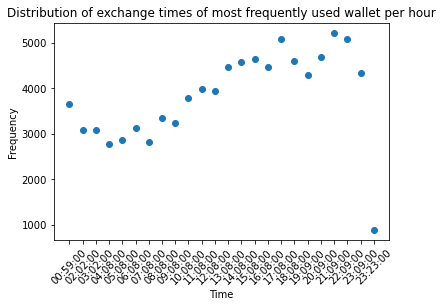

In [165]:
plt.scatter(hourly_top_add_times['times'],hourly_top_add_times['counts'])
plt.xlabel("Time")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.title("Distribution of exchange times of most frequently used wallet per hour")
plt.show()